Importando as bibliotecas e o CSV

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('Sprint3 Diabetes.csv')


# separando as colunas

In [2]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [3]:
df.describe

<bound method NDFrame.describe of         Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealt

In [4]:
df.info

<bound method DataFrame.info of         Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthc

Calcular a matriz de correlação

In [5]:

# 1. Calcular a matriz de correlação
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Diabetes_012'].sort_values(ascending=False)
# Exibir as correlações mais altas com a variável alvo
print("Correlação com a variável alvo 'Diabetes_012':")
print(correlation_with_target)

Correlação com a variável alvo 'Diabetes_012':
Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64


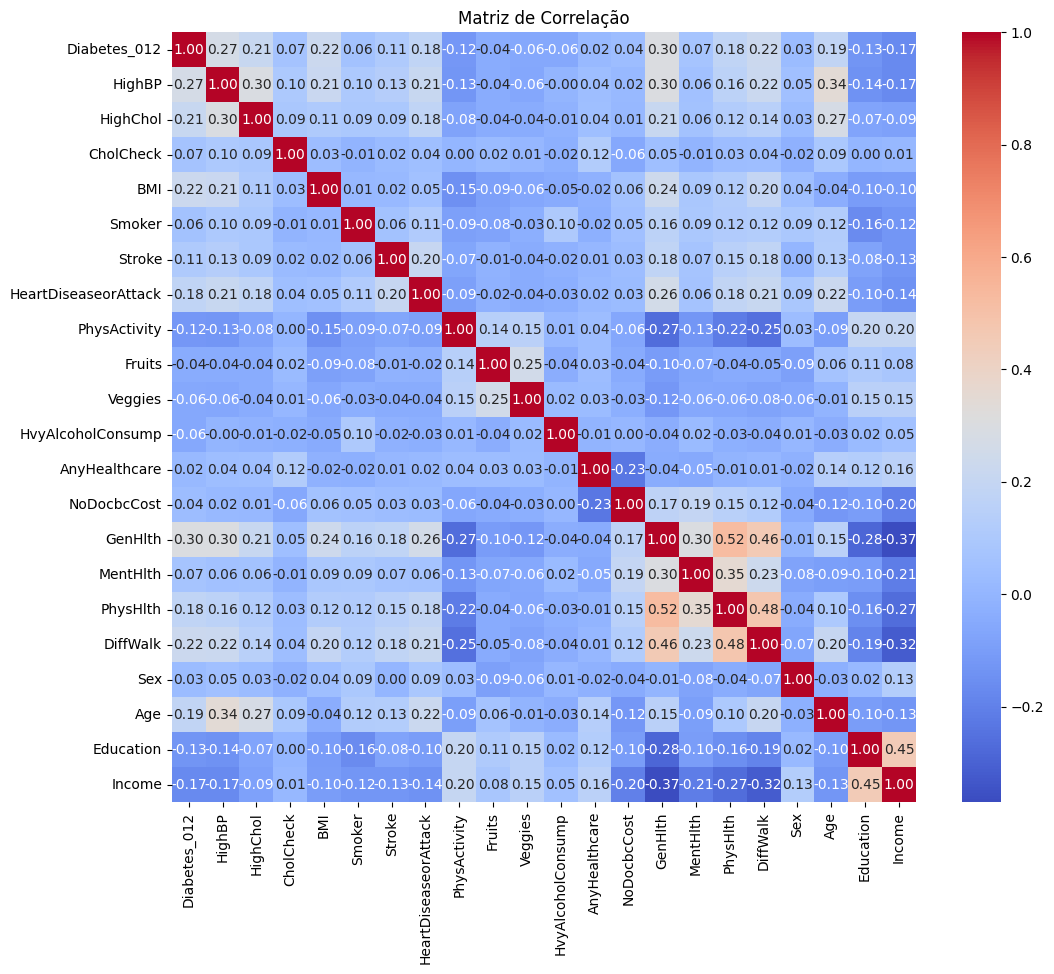

In [6]:
# Assuming 'correlation_matrix' is your calculated correlation matrix
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [7]:
# 1. Calcular a matriz de correlação
correlation_matrix = data.corr()

# 2. Obter as correlações com a variável alvo 'Diabetes_012'
correlation_with_target = correlation_matrix['Diabetes_012'].sort_values(ascending=False)

# 3. Exibir as correlações mais altas (excluindo a correlação da variável consigo mesma)
print("Correlação com a variável alvo 'Diabetes_012':")
print(correlation_with_target[1:])  # Exclui a primeira linha (correlação da variável consigo mesma)

# 4. Definir um limite para selecionar as colunas mais correlacionadas (por exemplo, 0.2)
threshold = 0.2

# 5. Filtrar as colunas com correlação acima do limite
most_correlated_columns = correlation_with_target[correlation_with_target > threshold].index

# 6. Exibir as colunas mais correlacionadas
print("\nColunas mais correlacionadas (acima do limite de", threshold, "):")
print(most_correlated_columns)

NameError: name 'data' is not defined

In [16]:
# Selecionar as variáveis mais correlacionadas
features = ['Diabetes_012', 'GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol']
X = data[features]
y = data['Diabetes_012']

In [18]:
# 2. Dividir os dados em conjunto de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar a floresta aleatória
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = rf_classifier.predict(X_test)

# 3. Avaliar o modelo usando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
print("Matriz de confusão:")
print(conf_matrix)

Matriz de confusão:
[[42795     0     0]
 [    0   944     0]
 [    0     0  6997]]


Compreendendo a Matriz de Confusão:

A matriz de confusão mostra a comparação entre as previsões do seu modelo (RandomForest) e os valores reais dos dados de teste.

Verdadeiro Positivo (TP): O modelo previu corretamente a classe positiva (diabetes) e o valor real também era positivo.
Verdadeiro Negativo (TN): O modelo previu corretamente a classe negativa (sem diabetes) e o valor real também era negativo.
Falso Positivo (FP): O modelo previu a classe positiva (diabetes), mas o valor real era negativo (erro tipo I).
Falso Negativo (FN): O modelo previu a classe negativa (sem diabetes), mas o valor real era positivo (erro tipo II).

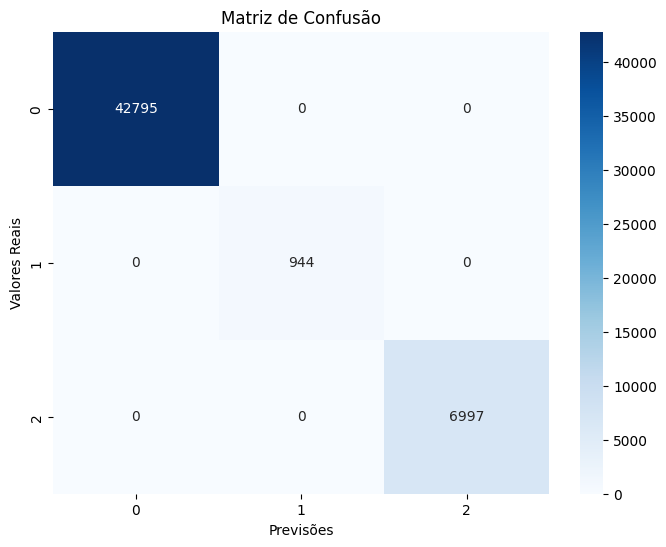

In [19]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")  # Cria o heatmap
plt.title("Matriz de Confusão")  # Define o título do gráfico
plt.xlabel("Previsões")  # Define o rótulo do eixo x
plt.ylabel("Valores Reais")  # Define o rótulo do eixo y
plt.show()  # Exibe o gráfico

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

# Calcular a precisão
precision = precision_score(y_test, y_pred, average='weighted')  # Add average='weighted'
print(f"Precisão: {precision}")

# Calcular o recall
recall = recall_score(y_test, y_pred, average='weighted')  # Add average='weighted'
print(f"Recall: {recall}")

# Calcular o F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Add average='weighted'
print(f"F1-score: {f1}")

Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0


In [32]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
cv_scores = cross_val_score(rf_classifier, X_train_val, y_train_val, cv=5, scoring='accuracy')

print("Pontuações da validação cruzada:", cv_scores)
print("Média da validação cruzada:", cv_scores.mean())


Pontuações da validação cruzada: [1. 1. 1. 1. 1.]
Média da validação cruzada: 1.0
